# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Erick Daniel Ortiz Cervantes

- ID: A01750495

- My carreer: IRS

# Importing libraries

In [349]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [350]:
df = pd.read_csv("A01750495_X.csv")

## b) Data managment


Print the first 7 rows

In [351]:
df.iloc[:7]

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0,8.348789,5.020195,-5.888046,5.794806,8.340772,-0.935601,10.394163,-6.916189,6.341539,4.548768,2.145434,5.371584
1,1,8.648847,6.421683,-6.006603,1.759940,8.497922,8.402490,9.000593,-9.373190,8.338160,5.950136,2.721930,4.538818
2,2,4.477151,-2.318723,0.254523,-0.464347,-2.531071,-4.057087,-4.708268,-10.818212,6.629540,2.614200,7.036097,5.841665
3,3,7.117138,8.963301,-11.891745,0.125200,8.161934,3.532388,7.441895,-9.411824,5.601707,8.243063,1.950217,6.062963
4,4,6.767591,1.342264,3.376188,-1.703980,-0.922346,3.828339,-12.740867,-11.135775,-4.462387,12.495764,-9.061340,-0.371087
5,5,7.156959,0.549748,4.527856,-0.790511,0.848727,7.440854,-8.416134,-10.507545,-2.883593,8.511597,-10.109990,2.053847
6,6,-6.037292,-7.368850,8.149370,-0.994410,5.845316,7.330971,7.579065,10.362281,6.457846,-5.032137,-4.995820,-2.875472


Print the last 4 rows

In [352]:
df.iloc[-4:]

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
745,745,6.764285,1.200297,5.964221,0.492905,-1.437007,0.244193,-11.017168,-6.861697,-0.318867,12.196419,-10.241132,0.064603
746,746,5.504396,8.417963,-7.316560,2.521870,4.710223,4.567829,9.736643,-10.023821,8.117613,7.774080,2.193797,8.899400
747,747,5.726848,6.167904,-9.358671,5.509649,6.075537,4.373527,7.970899,-11.043114,5.957280,8.922225,3.349237,6.728623
748,748,9.182831,2.105596,4.378247,-4.129865,2.621646,8.502331,-12.402937,-9.905571,-2.799844,8.053159,-7.740015,7.779843


How many rows and columns are in your data?

Use the `shape` method


In [353]:
rows, cols = df.shape

print(f"Filas -> {rows}\nColumnas -> {cols}")

Filas -> 749
Columnas -> 13


Print the name of all columns

Use the `columns` method

In [354]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [355]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
dtype: object

What is the meaning of rows and columns?

Your responses here

1. Las filas representan muestras de algo de lo que se tuvo registro, mientras que las columnas representan las mediciones o valores asociados a cada muestra

2. La primera columna **Unnamed: 0**, y debido a que incrementa en 1 en cada muestra, representa el índice o número de cada muestra 

...

Print a statistical summary of your columns


In [356]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,374.000000,3.971333,-0.406372,-1.461902,-1.373784,0.605720,2.580061,0.793280,-1.678153,1.993107,1.169441,0.992193,1.953216
std,216.361965,4.102361,5.079131,6.735405,3.659506,4.419160,4.816161,7.543578,8.662426,6.446090,5.904749,7.084229,4.339775
min,0.000000,-6.037292,-13.622310,-13.849218,-12.866352,-8.936910,-10.383047,-15.622597,-15.171615,-11.282966,-10.073137,-14.402408,-7.855336
25%,187.000000,0.791187,-3.511850,-8.411428,-3.908075,-2.899069,1.041421,-6.730404,-8.908725,-4.244531,-4.293063,-4.996024,-1.871870
50%,374.000000,4.628394,-0.184125,0.254523,-1.573885,-0.113286,3.818753,3.192212,-6.592407,4.031278,0.818220,1.526815,2.404182
75%,561.000000,7.200442,3.448774,4.537137,1.169298,3.895302,5.821098,7.257018,7.827550,7.485587,6.565472,7.457613,5.567364
max,748.000000,13.792109,12.292095,9.924181,8.101617,12.210739,13.364140,14.574801,15.081476,14.201871,13.121761,12.975579,12.214388


1. What is the minumum and maximum values of each variable:

|     | Unnamed: 0 | x1 | x2 | x3 | x4 | x5 | x6 | x7 | x8 | x9 | x10 | x11 | x12 |
| :-- | :--------: | -- | -- | -- | -- | -- | -- | -- | -- | -- | --- | --- | --- |
| min | 0.000000   | -6.037292 | -13.622310 | -13.849218 | -12.866352 | -8.936910 | -10.383047 | -15.622597 | -15.171615 | -11.282966 | -10.073137 | -14.402408 | -7.855336
| max | 748.000000 | 13.792109 | 12.292095 | 9.924181 | 8.101617 | 12.210739 | 13.364140 | 14.574801 | 15.081476 | 14.201871 | 13.121761 | 12.975579 | 12.214388

2. What is the mean and standar deviation of each variable:

|     | Unnamed: 0 | x1 | x2 | x3 | x4 | x5 | x6 | x7 | x8 | x9 | x10 | x11 | x12 |
| :-- | :--------: | -- | -- | -- | -- | -- | -- | -- | -- | -- | --- | --- | --- |
| mean | 374.000000 | 3.971333 | -0.406372 | -1.461902 | -1.373784 | 0.605720 | 2.580061 | 0.793280 | -1.678153 | 1.993107 | 1.169441 | 0.992193 | 1.953216
| std | 216.361965 | 4.102361 | 5.079131 | 6.735405 | 3.659506 | 4.419160 | 4.816161 | 7.543578 | 8.662426 | 6.446090 | 5.904749 | 7.084229 | 4.339775

3. What the 25%, 50% and 75% represent?:

Representan los cuartiles Q1, Q2 y Q3 del conjunto de datos, es decir, Q1 representa hasta que valor cae el primer 25% de los datos, Q2 representa la mediana y es donde el conjunto de datos está dividido en dos partes iguales, Q3 es donde es la cae del primer 75% de los datos

Rename the columns using the same name with capital letters

In [357]:
df.rename(columns=lambda x: x.upper(), inplace=True)

df

,UNNAMED: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,0,8.348789,5.020195,-5.888046,5.794806,8.340772,-0.935601,10.394163,-6.916189,6.341539,4.548768,2.145434,5.371584
1,1,8.648847,6.421683,-6.006603,1.759940,8.497922,8.402490,9.000593,-9.373190,8.338160,5.950136,2.721930,4.538818
2,2,4.477151,-2.318723,0.254523,-0.464347,-2.531071,-4.057087,-4.708268,-10.818212,6.629540,2.614200,7.036097,5.841665
3,3,7.117138,8.963301,-11.891745,0.125200,8.161934,3.532388,7.441895,-9.411824,5.601707,8.243063,1.950217,6.062963
4,4,6.767591,1.342264,3.376188,-1.703980,-0.922346,3.828339,-12.740867,-11.135775,-4.462387,12.495764,-9.061340,-0.371087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,744,7.625811,2.827837,2.205925,-1.992363,0.359377,2.898572,-13.784048,-9.775776,-1.142422,11.544150,-5.338982,-0.751822
745,745,6.764285,1.200297,5.964221,0.492905,-1.437007,0.244193,-11.017168,-6.861697,-0.318867,12.196419,-10.241132,0.064603
746,746,5.504396,8.417963,-7.316560,2.521870,4.710223,4.567829,9.736643,-10.023821,8.117613,7.774080,2.193797,8.899400
747,747,5.726848,6.167904,-9.358671,5.509649,6.075537,4.373527,7.970899,-11.043114,5.957280,8.922225,3.349237,6.728623


Rename the columns to their original names

In [358]:
for idx, org_col in enumerate(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']):
    df.rename(columns={df.columns[idx] : org_col}, inplace=True)

df

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0,8.348789,5.020195,-5.888046,5.794806,8.340772,-0.935601,10.394163,-6.916189,6.341539,4.548768,2.145434,5.371584
1,1,8.648847,6.421683,-6.006603,1.759940,8.497922,8.402490,9.000593,-9.373190,8.338160,5.950136,2.721930,4.538818
2,2,4.477151,-2.318723,0.254523,-0.464347,-2.531071,-4.057087,-4.708268,-10.818212,6.629540,2.614200,7.036097,5.841665
3,3,7.117138,8.963301,-11.891745,0.125200,8.161934,3.532388,7.441895,-9.411824,5.601707,8.243063,1.950217,6.062963
4,4,6.767591,1.342264,3.376188,-1.703980,-0.922346,3.828339,-12.740867,-11.135775,-4.462387,12.495764,-9.061340,-0.371087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,744,7.625811,2.827837,2.205925,-1.992363,0.359377,2.898572,-13.784048,-9.775776,-1.142422,11.544150,-5.338982,-0.751822
745,745,6.764285,1.200297,5.964221,0.492905,-1.437007,0.244193,-11.017168,-6.861697,-0.318867,12.196419,-10.241132,0.064603
746,746,5.504396,8.417963,-7.316560,2.521870,4.710223,4.567829,9.736643,-10.023821,8.117613,7.774080,2.193797,8.899400
747,747,5.726848,6.167904,-9.358671,5.509649,6.075537,4.373527,7.970899,-11.043114,5.957280,8.922225,3.349237,6.728623


Use two different alternatives to get one of the columns

In [359]:
df.iloc[:, 1]

0      8.348789
1      8.648847
2      4.477151
3      7.117138
4      6.767591
         ...   
744    7.625811
745    6.764285
746    5.504396
747    5.726848
748    9.182831
Name: x1, Length: 749, dtype: float64

In [360]:
df.x1

0      8.348789
1      8.648847
2      4.477151
3      7.117138
4      6.767591
         ...   
744    7.625811
745    6.764285
746    5.504396
747    5.726848
748    9.182831
Name: x1, Length: 749, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [361]:
df.iloc[62:73, 1:3]

,x1,x2
62,6.091152,2.799091
63,3.078900,-1.902392
64,1.903918,-1.976098
65,2.614561,1.417820
66,6.618985,-3.453994
67,-3.204104,-6.644848
68,2.552576,-3.145485
69,-1.898861,0.337016
70,9.600849,7.562309
71,-0.450459,4.098178


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [362]:
nulls = df.iloc[:, 1:3].isnull().sum()
not_nulls = df.iloc[:, 1:3].notnull().sum()
totals = df.iloc[:, 1:3].count()

nulls + not_nulls == totals

x1    True
x2    True
dtype: bool

Discard the last column


In [363]:
df.drop(columns="x12", inplace=True)
df

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,8.348789,5.020195,-5.888046,5.794806,8.340772,-0.935601,10.394163,-6.916189,6.341539,4.548768,2.145434
1,1,8.648847,6.421683,-6.006603,1.759940,8.497922,8.402490,9.000593,-9.373190,8.338160,5.950136,2.721930
2,2,4.477151,-2.318723,0.254523,-0.464347,-2.531071,-4.057087,-4.708268,-10.818212,6.629540,2.614200,7.036097
3,3,7.117138,8.963301,-11.891745,0.125200,8.161934,3.532388,7.441895,-9.411824,5.601707,8.243063,1.950217
4,4,6.767591,1.342264,3.376188,-1.703980,-0.922346,3.828339,-12.740867,-11.135775,-4.462387,12.495764,-9.061340
...,...,...,...,...,...,...,...,...,...,...,...,...
744,744,7.625811,2.827837,2.205925,-1.992363,0.359377,2.898572,-13.784048,-9.775776,-1.142422,11.544150,-5.338982
745,745,6.764285,1.200297,5.964221,0.492905,-1.437007,0.244193,-11.017168,-6.861697,-0.318867,12.196419,-10.241132
746,746,5.504396,8.417963,-7.316560,2.521870,4.710223,4.567829,9.736643,-10.023821,8.117613,7.774080,2.193797
747,747,5.726848,6.167904,-9.358671,5.509649,6.075537,4.373527,7.970899,-11.043114,5.957280,8.922225,3.349237


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:

El conjunto de datos se componía originalmente de 749 filas y 13 columnas de mediciones aleatorias, se hicieron distintas operaciones como extraer datos de ciertas columnas, extraer un ciertos datos de ciertas columnas, renombrar las columnas y eliminar columnas; así como verificar datos nulos

## c) Data visualization

Plot in the histogram of one of the variables

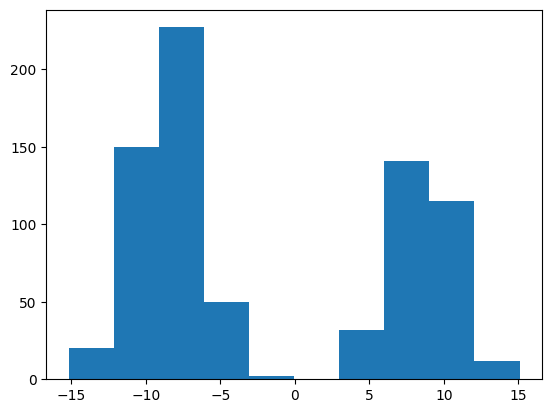

In [364]:
plt.hist(df.x8);

Plot in the same figure the histogram of two variables



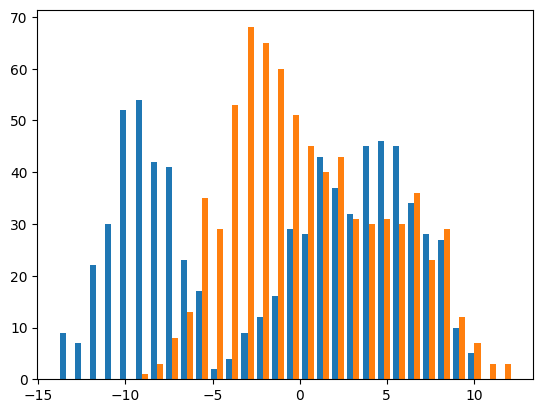

In [365]:
plt.hist([df.x3, df.x5], bins=30);

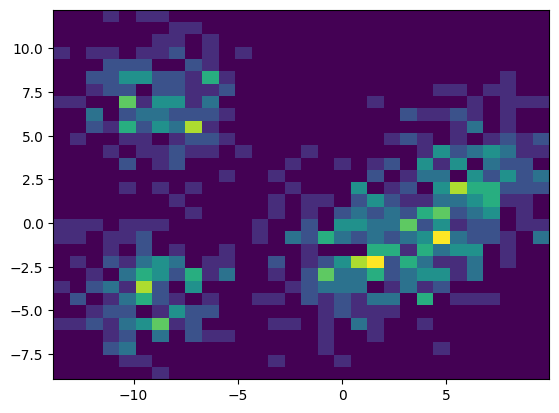

In [366]:
plt.hist2d(df.x3, df.x5, bins=30);

Based on these plots, provide a description of your data:

Your response here:

En la primera gŕafica se puede observar la distribución de los datos de la columan **x8**. Las siguientes gráficas comparan las distribuciones de **x3** y **x5**, en el caso de la segunda gráfica, y en el caso de la última, muestra la relación de los datos entre ambas columnas a través de un mapa 2D, donde las regiones más amarillas representan donde los datos de ambos conjuntos coinciden más

Plot the boxplot of one of the variables

<Axes: ylabel='x4'>

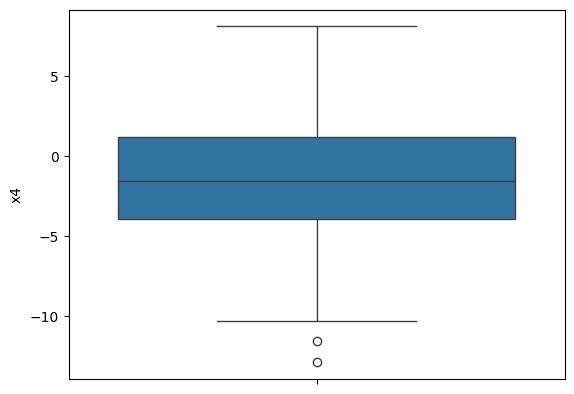

In [367]:
sns.boxplot(data=df.x4)

Plot in the same figure the boxplot of two variables

<Axes: >

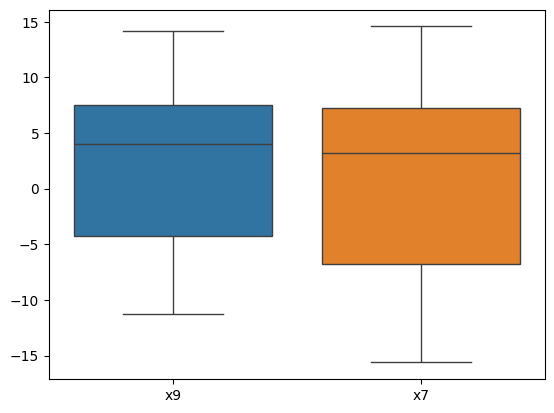

In [368]:
sns.boxplot(data=[df.x9, df.x7])

Based on these plots, provide a description of your data:

Your response here:

Las cajas de bigotes ayudan a representar cómo es que los datos están distribuidos en función de sus percentiles, es decir, donde están el 25%, el 50% o mediana y el 75% de los datos, así como los valores mínimos, máximos y datos atípicos

Plot the scatter plot between all pair of variables

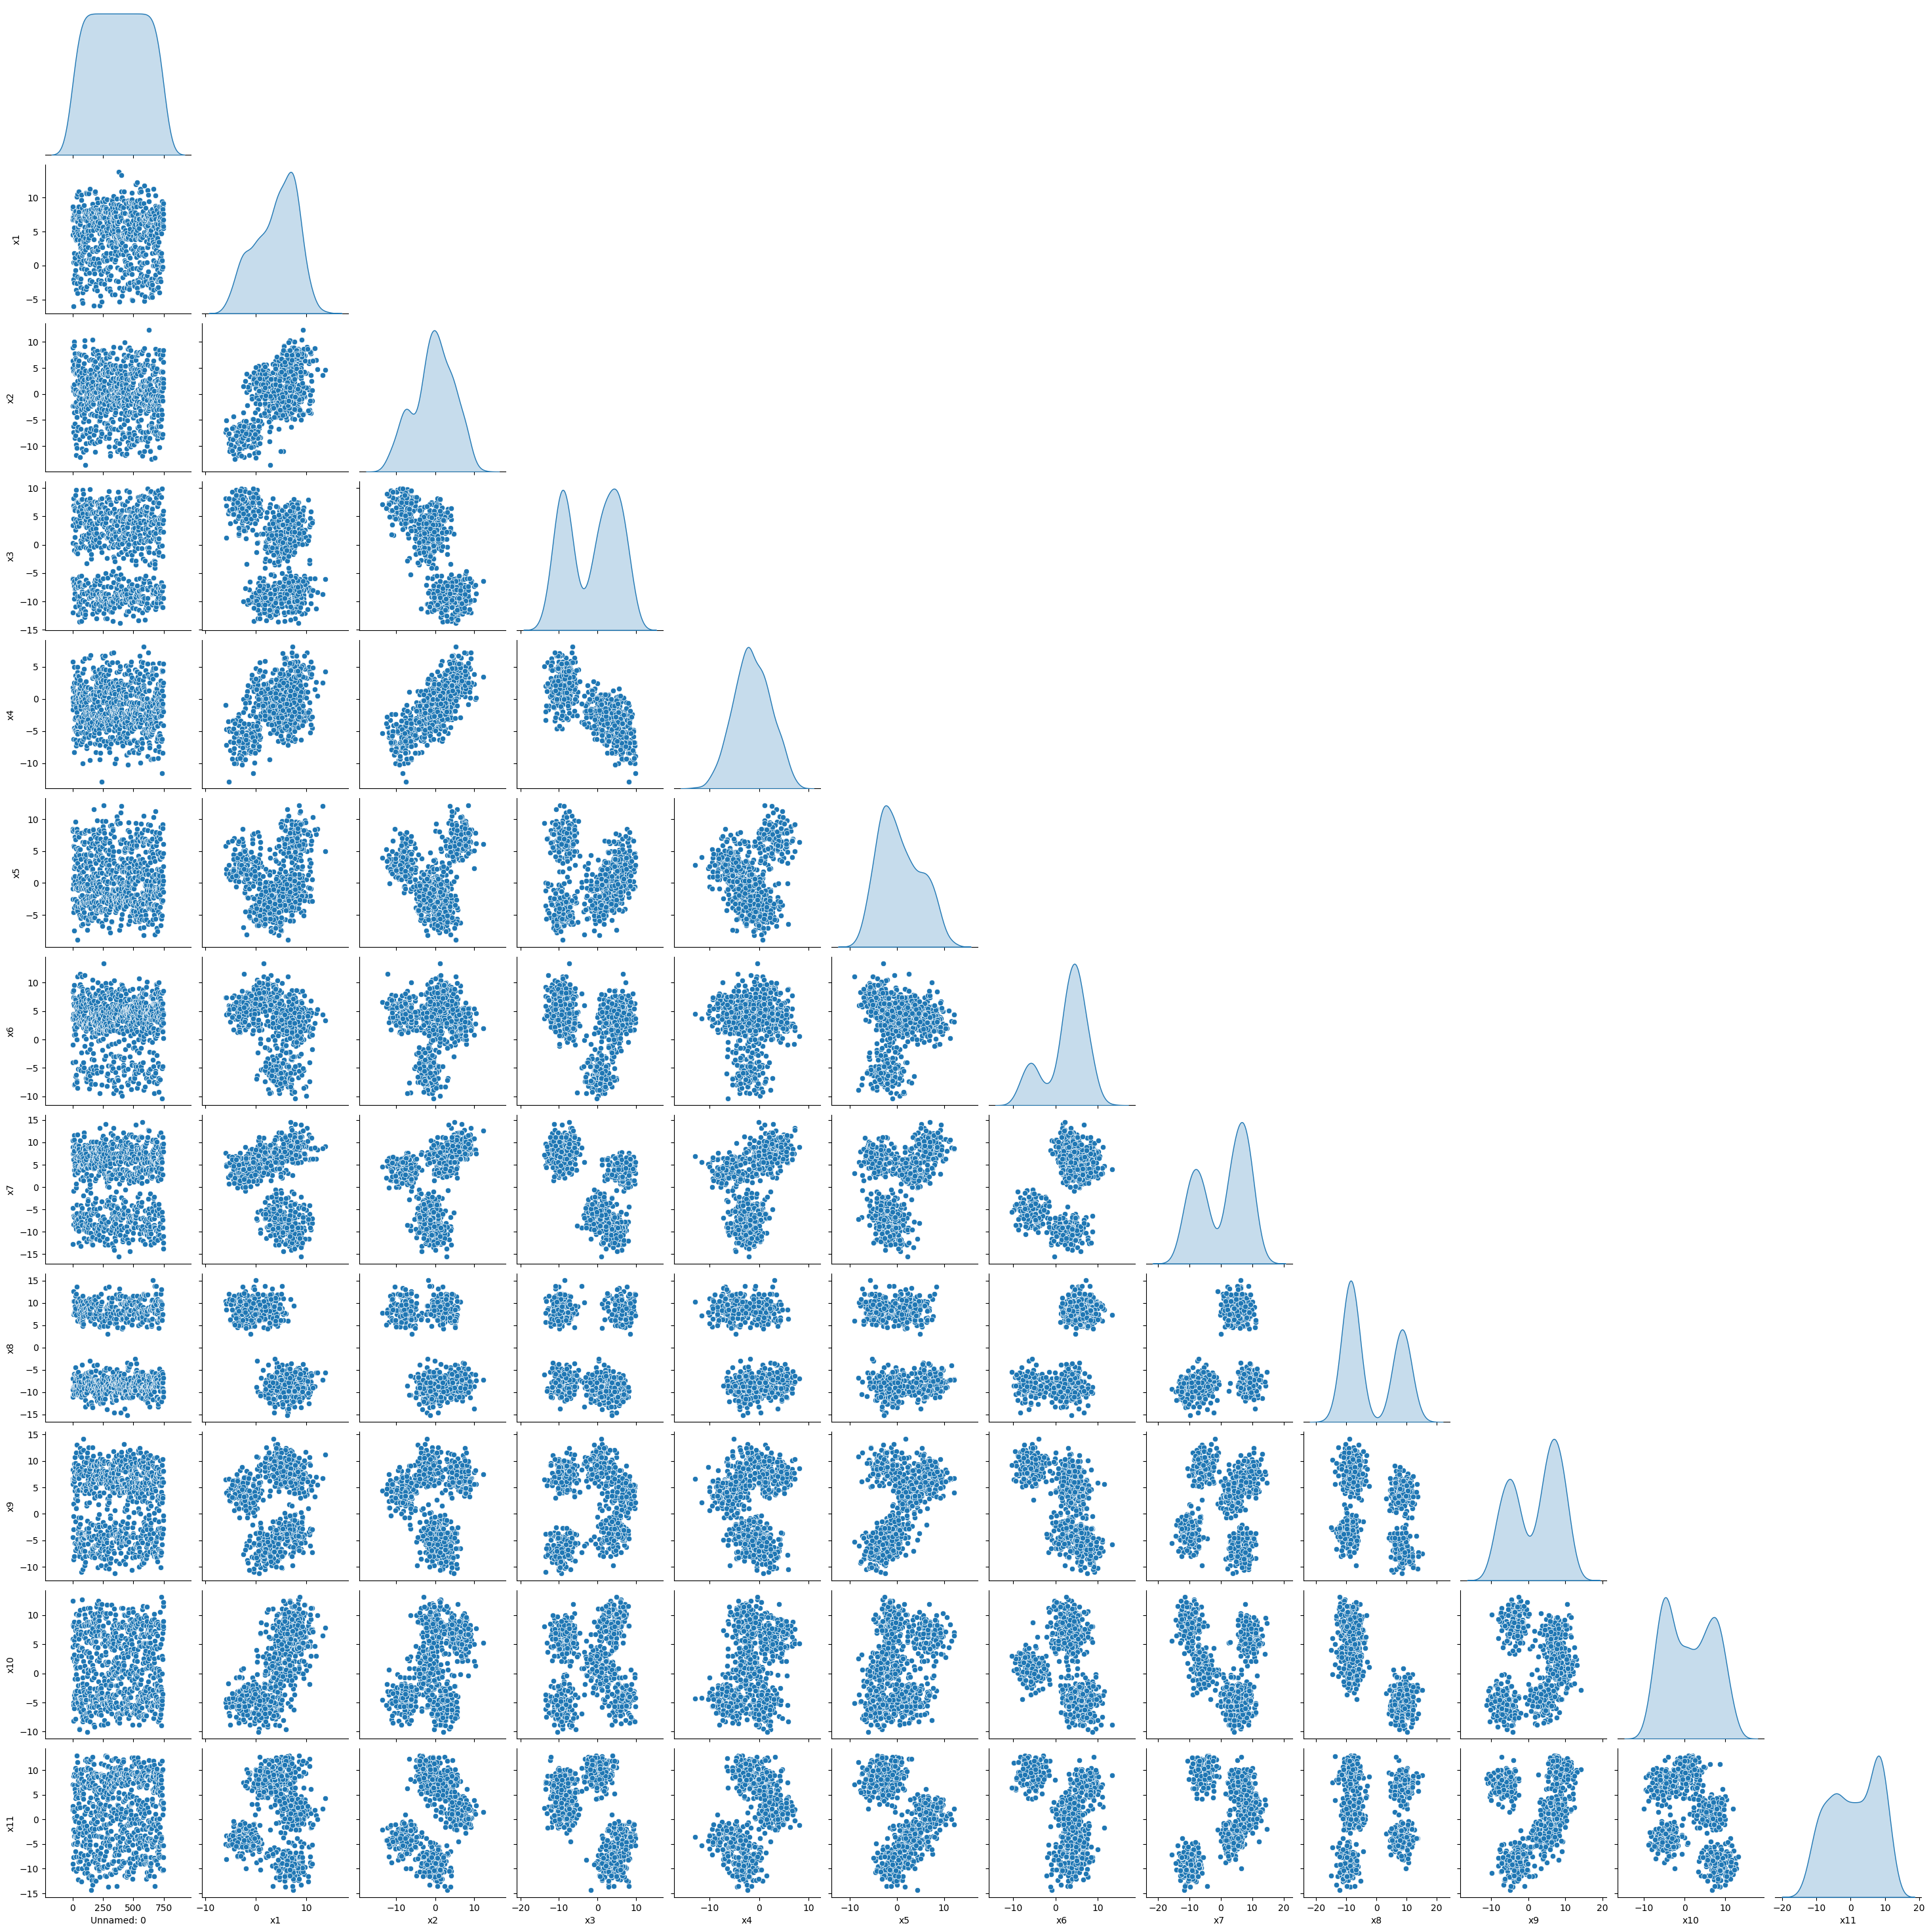

In [369]:
sns.pairplot(df, corner=True, diag_kind="kde");

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:

Se puede ver que en la primera columna de scatterplots se la distribución de los datos no es lineal, si no más bien uniforme en todo el espacio, esto es porque la columna **Unnamed: 0** aumenta uniformemente en 1 en cada muestra. El resto de las gráficas permite observar que los datos tienen una cierta tendencia a agruparse en determinadas regiones en mayor o menor medida en función de qué variables se esten comparando; son más o menos 4 los grupos en los que se pueden acomodar los datos

## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [370]:
from sklearn.cluster import KMeans

n_clusters = 5
X = df.iloc[:, [9, 11]]

Add to your dataset a column with the estimated cluster to each data point

In [371]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

Print the number associated to each cluster

In [372]:
print(df['Cluster'].value_counts())

Cluster
1    153
2    152
0    150
4    149
3    145
Name: count, dtype: int64


Print the centroids

In [373]:
print(kmeans.cluster_centers_)

[[-6.66357909  7.10330557]
 [ 4.22766472 -3.87570899]
 [-3.61285632 -8.94638149]
 [ 8.98913796  9.5372722 ]
 [ 7.32396231  1.66164765]]


Print the intertia metric

In [374]:
print(kmeans.inertia_)

5611.81107002901


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

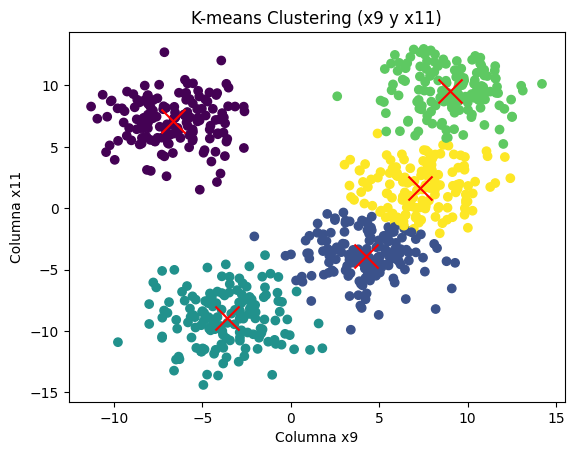

In [375]:
# Graficar los datos
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], cmap='viridis', marker='o')

# Graficar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')

plt.title('K-means Clustering (x9 y x11)')
plt.xlabel('Columna x9')
plt.ylabel('Columna x11')
plt.show()

### Questions

Provides a detailed description of your results

Your response:

Los datos de las columnas **x9** y **x11** pudieron ser acomodados en 4 diferentes grupos sin problema alguno. Además, se ve perfectamente que los centroides representan correctamente cuales son los grupos de datos en la gráfica

## d) Elbow plot

Compute the Elbow plot

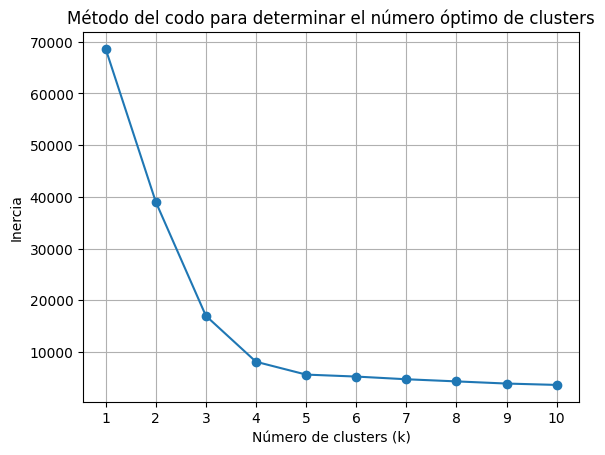

In [376]:
inertias = []
K_range = range(1, 11)  # Probamos de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)  # Guardamos la inercia

plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.xticks(K_range)
plt.grid()
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:

El número de clusters optimo obtenido por medio de la gráfica de codo fue de 5 clusters en lugar de 4, que fue la suposición inicial. Esto es debido a que después de 5 clusters, el valor de la inercia o compactabilidad de los clusters pareciera no decrecer, lo que indica que ese es el valor óptimo para **k**

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:

El número de clusters propuesto al inicio, 4, no coincidió con el de la gráfica, pues este dio 5 para **k**, sin embargo, se puede ver que la diferencia, aunque notoria, no es drástica, por lo que aun usando solo 4 clusters el agrupamiento puede hacerse sin problema alguno y aun ser bueno

# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [377]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data    # Características (64 píxeles)
y = digits.target  # Etiquetas (dígitos reales)

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

2) Plot some of the observations (add in the title the label/digit of that obserbation)

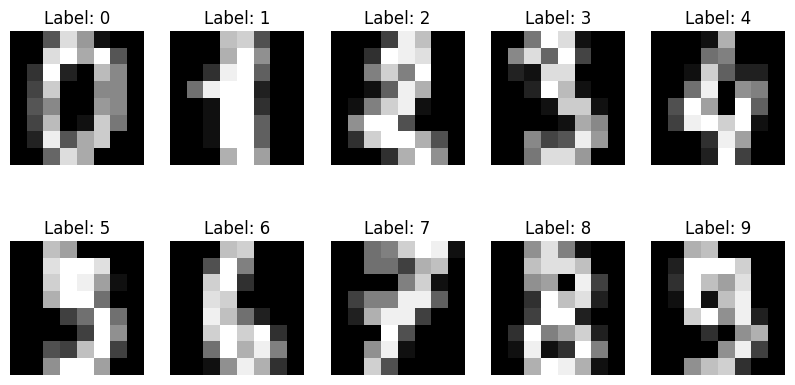

In [378]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [379]:
kmeans_all = KMeans(n_clusters=10, random_state=42)  # 10 clusters (uno por cada dígito)
kmeans_all.fit(X)
y_pred_all = kmeans_all.predict(X)

In [380]:
# Seleccionar las 8 variables de la primera fila (píxeles 0 a 7)
X_first_row = X[:, :8]
kmeans_first_row = KMeans(n_clusters=10, random_state=42)
kmeans_first_row.fit(X_first_row)
y_pred_first_row = kmeans_first_row.predict(X_first_row)

In [381]:
# Seleccionar las 8 variables de la cuarta fila (píxeles 24 a 31)
X_fourth_row = X[:, 24:32]
kmeans_fourth_row = KMeans(n_clusters=10, random_state=42)
kmeans_fourth_row.fit(X_fourth_row)
y_pred_fourth_row = kmeans_fourth_row.predict(X_fourth_row)

In [382]:
# Seleccionar las 8 variables de la octava fila (píxeles 56 a 63)
X_eighth_row = X[:, 56:64]
kmeans_eighth_row = KMeans(n_clusters=10, random_state=42)
kmeans_eighth_row.fit(X_eighth_row)
y_pred_eighth_row = kmeans_eighth_row.predict(X_eighth_row)

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

In [383]:
# Función para graficar y comparar etiquetas
def plot_comparison(X, y_real, y_pred, title):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(X[i].reshape(8, 8), cmap='gray')
        ax.set_title(f"Real: {y_real[i]}\nPred: {y_pred[i]}")
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

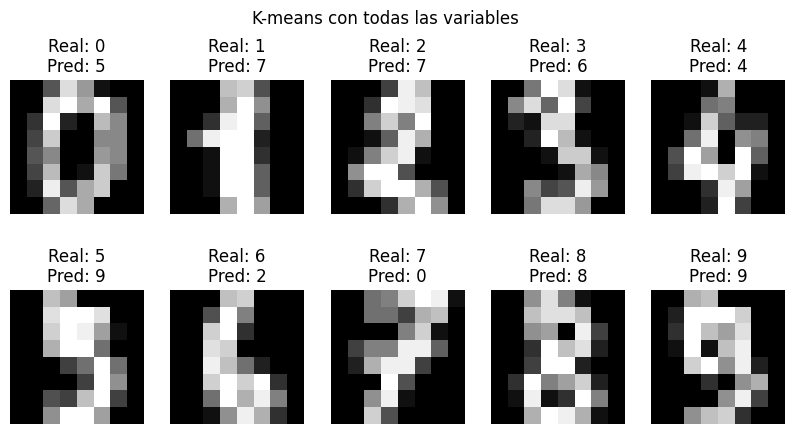

In [384]:
# Comparar resultados para K-means con todas las variables
plot_comparison(X, y, y_pred_all, "K-means con todas las variables")

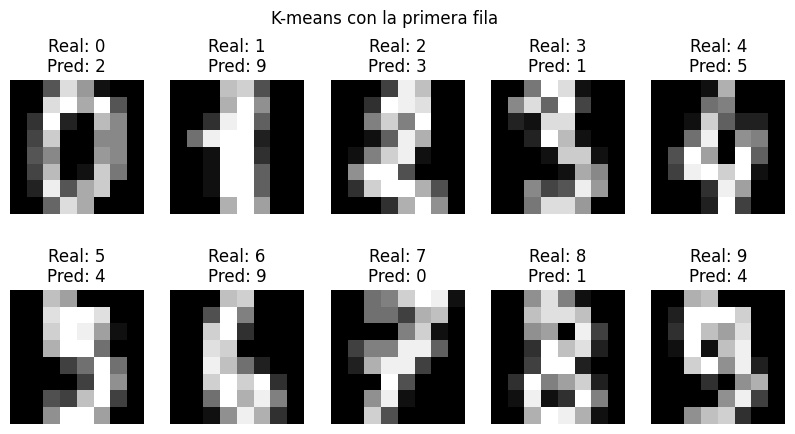

In [385]:
# Comparar resultados para K-means con la primera fila
plot_comparison(X, y, y_pred_first_row, "K-means con la primera fila")

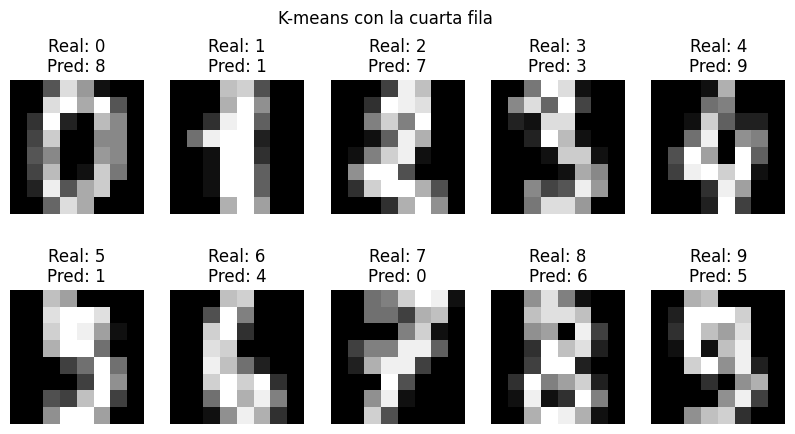

In [386]:
# Comparar resultados para K-means con la cuarta fila
plot_comparison(X, y, y_pred_fourth_row, "K-means con la cuarta fila")

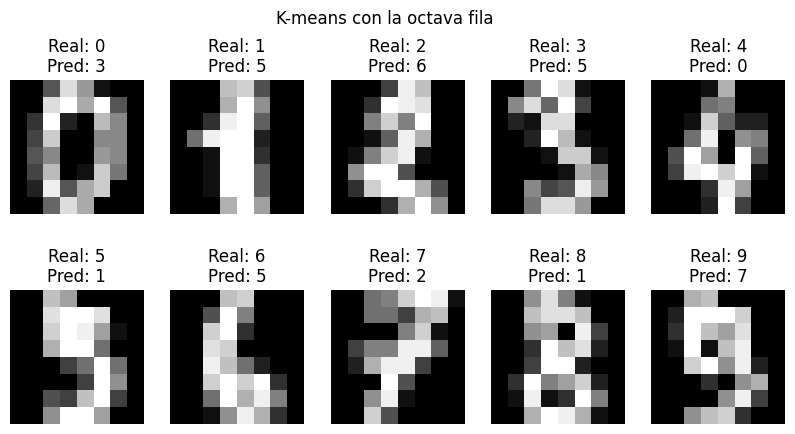

In [387]:
# Comparar resultados para K-means con la octava fila
plot_comparison(X, y, y_pred_eighth_row, "K-means con la octava fila")

5) Compute the Elbow plot

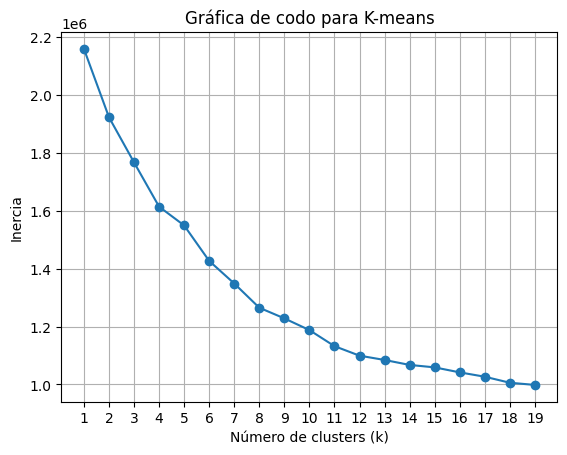

In [388]:
inertias = []
K_range = range(1, 20)  # Probamos de 1 a 19 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar la gráfica de codo
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Gráfica de codo para K-means')
plt.xticks(K_range)
plt.grid()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

La clusterización que mejores resultados dió fue la de **KMeansAll**, pues se tenía acceso a toda la información de los dígitos, lo que le permitía hacer mejores predicciones, con un total de 3 aciertos en comparación de los 0 a 2 aciertos de las otras clusterizaciones. Sin embargo, al realizar la gráfica de codo, se pudo ver que por mucho que se aumentara el número de clusters, se pudo ver que no hay un número óptimo de clusters pues la tasa de decrecimiento seguía siendo algo elevada para poder encontrar un valor óptimo

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [389]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

digits = load_digits()
X = digits.data    # Características (64 píxeles)
y = digits.target  # Etiquetas (dígitos reales)

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

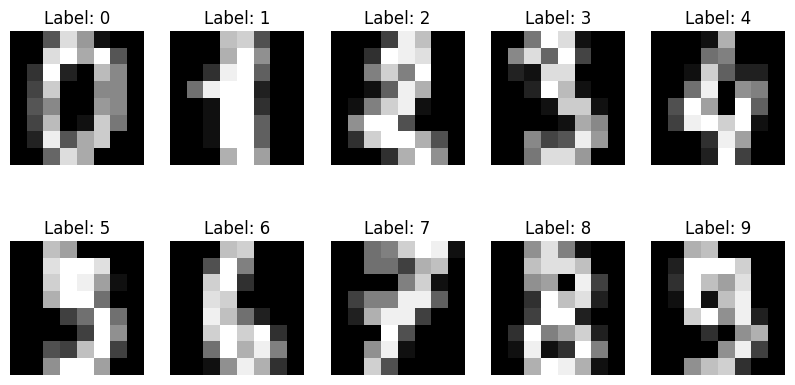

In [390]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

3) Split the dataset in train and test

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [392]:
# Entrenar el clasificador SVM
classifier_all = SVC(kernel='linear', random_state=42)
classifier_all.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [393]:
# Seleccionar las 8 variables de la primera columna (píxeles 0, 8, 16, ..., 56)
X_train_first_col = X_train[:, ::8]
X_test_first_col = X_test[:, ::8]

# Entrenar el clasificador SVM
classifier_first_col = SVC(kernel='linear', random_state=42)
classifier_first_col.fit(X_train_first_col, y_train)

SVC(kernel='linear', random_state=42)

In [394]:
# Seleccionar las 8 variables de la cuarta columna (píxeles 3, 11, 19, ..., 59)
X_train_fourth_col = X_train[:, 3::8]
X_test_fourth_col = X_test[:, 3::8]

# Entrenar el clasificador SVM
classifier_fourth_col = SVC(kernel='linear', random_state=42)
classifier_fourth_col.fit(X_train_fourth_col, y_train)

SVC(kernel='linear', random_state=42)

In [395]:
# Seleccionar las 8 variables de la octava columna (píxeles 7, 15, 23, ..., 63)
X_train_eighth_col = X_train[:, 7::8]
X_test_eighth_col = X_test[:, 7::8]

# Entrenar el clasificador SVM
classifier_eighth_col = SVC(kernel='linear', random_state=42)
classifier_eighth_col.fit(X_train_eighth_col, y_train)

SVC(kernel='linear', random_state=42)

5) Make predictions (use the test set)

In [397]:
# Predecir en el conjunto de prueba
y_pred_all = classifier_all.predict(X_test)

# Predecir en el conjunto de prueba
y_pred_first_col = classifier_first_col.predict(X_test_first_col)

# Predecir en el conjunto de prueba
y_pred_fourth_col = classifier_fourth_col.predict(X_test_fourth_col)

# Predecir en el conjunto de prueba
y_pred_eighth_col = classifier_eighth_col.predict(X_test_eighth_col)

6) Compute performance metrics

In [398]:
# Función para calcular métricas
def evaluate_classifier(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{title} - Exactitud: {accuracy:.2f}")
    print("Reporte de clasificación:")
    print(classification_report(y_true, y_pred))

In [399]:
evaluate_classifier(y_test, y_pred_all, "Clasificador con todas las variables")

Clasificador con todas las variables - Exactitud: 0.98
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [400]:
evaluate_classifier(y_test, y_pred_first_col, "Clasificador con primera columna")

Clasificador con primera columna - Exactitud: 0.08
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.08      1.00      0.15        28
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        34
           4       1.00      0.02      0.04        46
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        34
           8       1.00      0.03      0.06        30
           9       0.00      0.00      0.00        40

    accuracy                           0.08       360
   macro avg       0.21      0.11      0.03       360
weighted avg       0.22      0.08      0.02       360



/home/dany/Downloads/TC1002S/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dany/Downloads/TC1002S/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dany/Downloads/TC1002S/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [401]:
evaluate_classifier(y_test, y_pred_fourth_col, "Clasificador con cuarta columna")

Clasificador con cuarta columna - Exactitud: 0.62
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        33
           1       0.69      0.86      0.76        28
           2       0.51      0.55      0.53        33
           3       0.54      0.74      0.62        34
           4       0.77      0.65      0.71        46
           5       0.47      0.36      0.41        47
           6       0.69      0.51      0.59        35
           7       0.65      0.71      0.68        34
           8       0.75      0.70      0.72        30
           9       0.54      0.47      0.51        40

    accuracy                           0.62       360
   macro avg       0.63      0.64      0.63       360
weighted avg       0.62      0.62      0.62       360



In [402]:
evaluate_classifier(y_test, y_pred_eighth_col, "Clasificador con octava columna")

Clasificador con octava columna - Exactitud: 0.14
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.14      0.04      0.06        28
           2       0.50      0.15      0.23        33
           3       0.10      0.94      0.18        34
           4       1.00      0.13      0.23        46
           5       0.00      0.00      0.00        47
           6       0.60      0.09      0.15        35
           7       0.50      0.06      0.11        34
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        40

    accuracy                           0.14       360
   macro avg       0.28      0.14      0.10       360
weighted avg       0.30      0.14      0.10       360



/home/dany/Downloads/TC1002S/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dany/Downloads/TC1002S/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dany/Downloads/TC1002S/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

In [403]:
# Función para graficar y comparar etiquetas
def plot_comparison(X_test, y_true, y_pred, title):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
        ax.set_title(f"Real: {y_true[i]}\nPred: {y_pred[i]}")
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

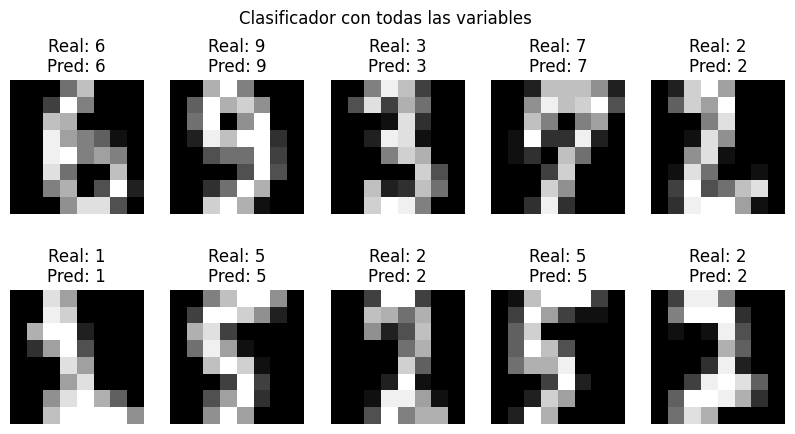

In [404]:
plot_comparison(X_test, y_test, y_pred_all, "Clasificador con todas las variables")

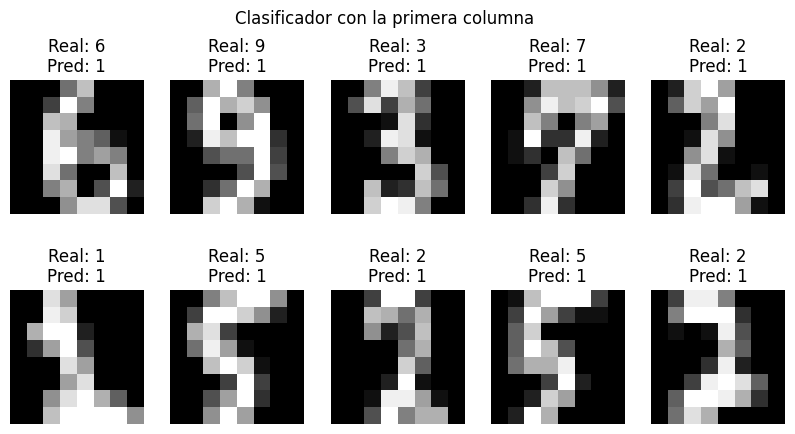

In [405]:
plot_comparison(X_test, y_test, y_pred_first_col, "Clasificador con la primera columna")

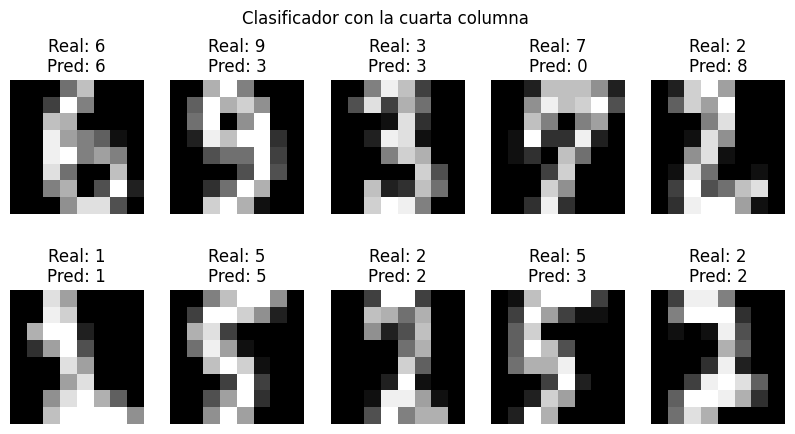

In [406]:
plot_comparison(X_test, y_test, y_pred_fourth_col, "Clasificador con la cuarta columna")

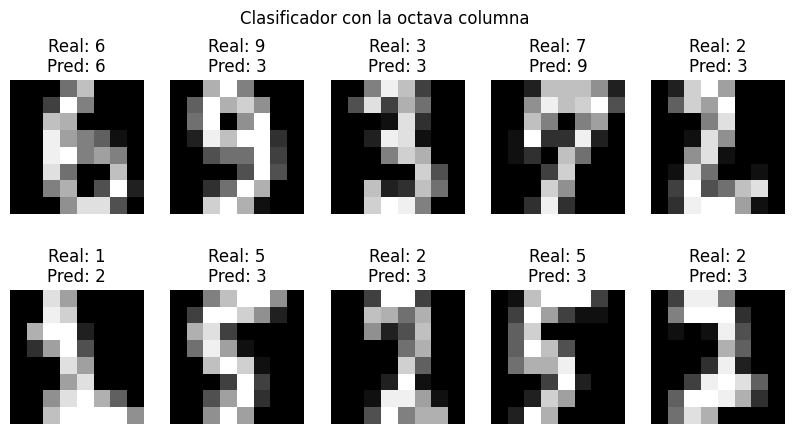

In [407]:
plot_comparison(X_test, y_test, y_pred_eighth_col, "Clasificador con la octava columna")

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

El mejor clasificador es el **ClassifierAll** pues tiene una precisión del 98% esto es debido a que el modelo fue entrenado con todos los datos disponibles en el *dataset*. La falta de datos hace que se pierda precisión, tal es el caso de **Classifier1col** donde apenas y se pudo tener una precisión del 8%

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

En esta actividad comprendí cómo es que se relacionan los datos de diferentes conjuntos, analizarlos y llegar a conclusiones, así como comparar y determinar la mejor estrategia para alcanzar un determinado objetivo, tal y como lo fue con el uso de K-means y de un clasificador para ver cual era mejor para predecir a qué número correspondía la muestra

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

En esta actividad trabajé con un conjunto de varias columnas las cuales analice y construí dos modelos para predecir un resultado, en este caso un modelo de K-means y un clasificador, además realicé un proceso de optimización para encontrar el número de clusters adecuado para K-means y elegí el mejor modelo para el clasificador